In [1]:
%matplotlib inline

In [2]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from plotly.offline import iplot, init_notebook_mode
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

,ds,y,deaths
0,2020-01-26,0.0,0
1,2020-01-27,0.0,0
2,2020-01-28,0.0,0
3,2020-01-29,0.0,0
4,2020-01-30,0.0,0


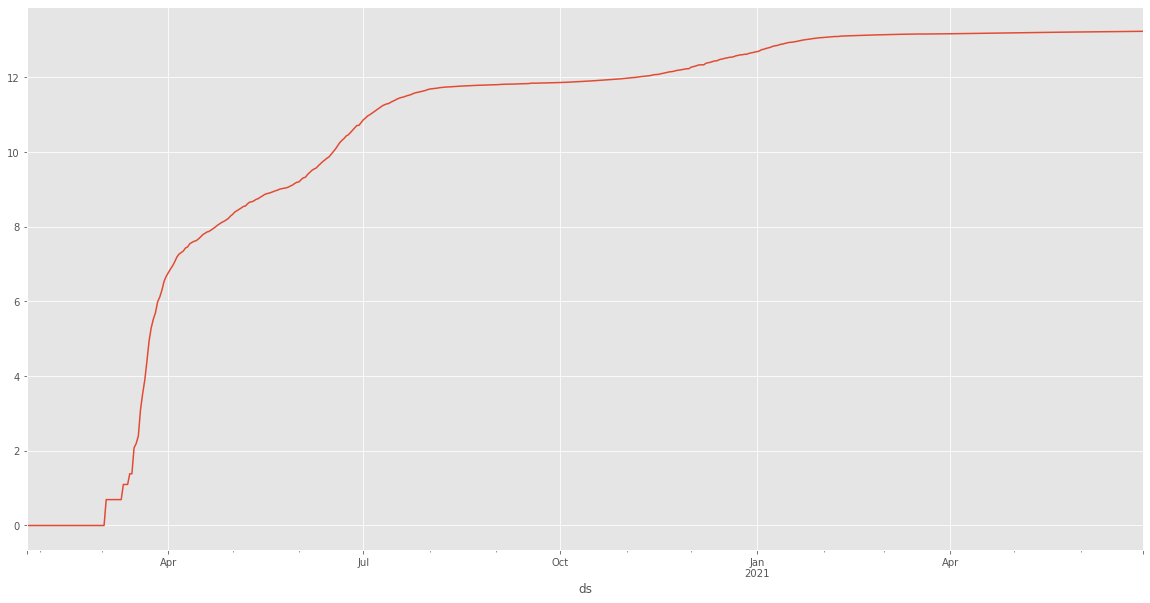

In [3]:
df1 = pd.read_csv('AZcases.csv', index_col='date', parse_dates=True)
df1 = df1.drop(['county','state','fips','cured'], axis =1)
df1 = df1.reset_index().rename(columns={'date':'ds', 'cases':'y'})
df1['y'] = np.log(df1['y'])
df1.set_index('ds').y.plot()
df1.head()

In [4]:
model = Prophet(yearly_seasonality = False, weekly_seasonality = False, daily_seasonality = True, changepoint_range = .9)
model.fit(df1);
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [5]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
547,2021-07-26,13.263097,12.800263,13.786790
548,2021-07-27,13.263869,12.777954,13.833498
549,2021-07-28,13.264640,12.755539,13.857467
550,2021-07-29,13.265412,12.737724,13.938217
551,2021-07-30,13.266184,12.736412,13.892963


In [6]:
forecast.sort_values('trend', ascending=False)[:10]
print(forecast[['ds', 'trend']].sort_values('trend', ascending=False)[:30])

            ds      trend
551 2021-07-30  13.362623
550 2021-07-29  13.361852
549 2021-07-28  13.361080
548 2021-07-27  13.360308
547 2021-07-26  13.359536
546 2021-07-25  13.358765
545 2021-07-24  13.357993
544 2021-07-23  13.357221
543 2021-07-22  13.356449
542 2021-07-21  13.355678
541 2021-07-20  13.354906
540 2021-07-19  13.354134
539 2021-07-18  13.353362
538 2021-07-17  13.352591
537 2021-07-16  13.351819
536 2021-07-15  13.351047
535 2021-07-14  13.350275
534 2021-07-13  13.349504
533 2021-07-12  13.348732
532 2021-07-11  13.347960
531 2021-07-10  13.347188
530 2021-07-09  13.346417
529 2021-07-08  13.345645
528 2021-07-07  13.344873
527 2021-07-06  13.344101
526 2021-07-05  13.343330
525 2021-07-04  13.342558
524 2021-07-03  13.341786
523 2021-07-02  13.341015
522 2021-07-01  13.340243


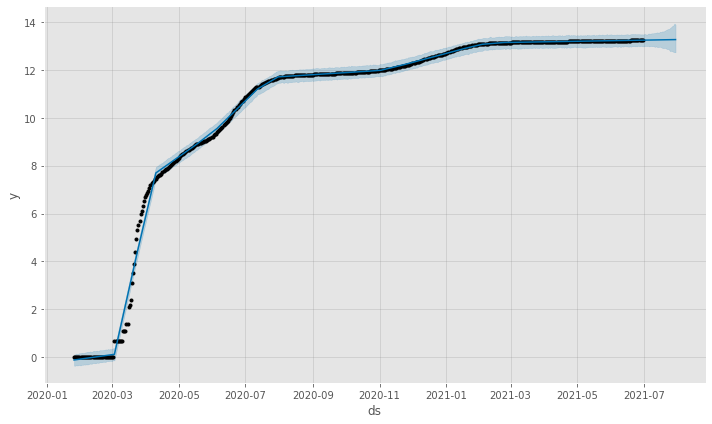

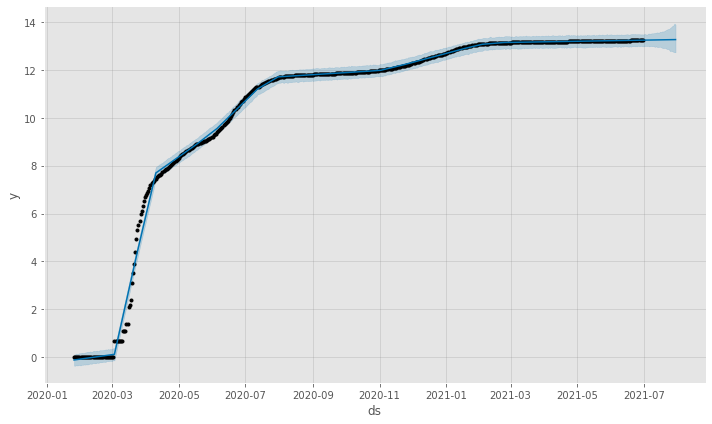

In [7]:
model.plot(forecast)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [10]:
metric_df = forecast.set_index('ds')[['yhat']].join(df1.set_index('ds').y).reset_index()

In [11]:
metric_df.dropna(inplace=True)

In [12]:
r2_score(metric_df.y, metric_df.yhat)

0.997421473077029

In [13]:
mean_squared_error(metric_df.y, metric_df.yhat)

0.03883862445057298

In [14]:
mean_absolute_error(metric_df.y, metric_df.yhat)

0.0783880124241432

In [15]:
np.sqrt(np.mean((metric_df.y - metric_df.yhat)**2))

0.1970751746176391